# Photovoltaic Installations Exploratory Data Analysis

While exploring this dataset, the following questions will be asked:

1. Which states have the cheapest and most expensive installations; which states have highest incentives? 

2. How have the prices changed over the years?

3. Which factors contribute the most to the total cost? 


### Exploring the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# read
pv_pop = pd.read_csv('Capstone/pv_pop_clean.csv', sep=',', low_memory=False)
pv_pop = pv_pop.reset_index(drop=True)
pv_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434598 entries, 0 to 434597
Data columns (total 21 columns):
date_installed                 434598 non-null object
city                           434598 non-null object
state_short                    434598 non-null object
state                          434598 non-null object
county                         429939 non-null object
population                     434598 non-null float64
size_kw                        434598 non-null float64
annual_insolation              434598 non-null float64
annual_pv_prod                 434598 non-null float64
reported_annual_energy_prod    434598 non-null float64
cost_per_watt                  301015 non-null float64
cost                           301015 non-null float64
sales_tax_cost                 226355 non-null float64
rebate                         199511 non-null float64
incentive_prog_names           434598 non-null object
install_type                   434598 non-null object
installer       

In [2]:
pv_pop.head()

,date_installed,city,state_short,state,county,population,size_kw,annual_insolation,annual_pv_prod,reported_annual_energy_prod,...,cost,sales_tax_cost,rebate,incentive_prog_names,install_type,installer,utility,tracking_type,tilt1,azimuth1
0,12/12/2013,austin,tx,texas,travis,885400.0,10.56,5.157692,14999.831600,13836.0,...,30600.53,1151.693704,15000.0,austin energy,residential,unknown,austin energy,fixed,10.0,180.0
1,07/11/2014,austin,tx,texas,travis,885400.0,12.72,5.085633,17811.574390,16419.0,...,40000.00,1507.165990,15000.0,austin energy,residential,unknown,austin energy,fixed,7.0,180.0
2,01/17/2014,austin,tx,texas,travis,885400.0,5.40,5.262714,7833.742822,7235.0,...,22665.58,854.019783,7735.5,austin energy,residential,unknown,austin energy,fixed,18.5,165.0
3,09/27/2012,austin,tx,texas,travis,885400.0,7.50,4.920972,10151.709590,9340.0,...,28125.00,1058.523673,14550.0,austin energy,residential,unknown,austin energy,fixed,5.0,260.0
4,09/26/2012,austin,tx,texas,travis,885400.0,5.00,5.304778,7307.133789,6729.0,...,19250.00,724.500647,9600.0,austin energy,residential,unknown,austin energy,fixed,33.0,205.0


In [3]:
# rebate_cost_ratio = rebate/cost
pv_pop['rebate_cost_ratio'] = (pv_pop['rebate'] / pv_pop['cost'])*100
pv_pop['sales_tax_percent'] = pv_pop['sales_tax_cost'] / pv_pop['cost'] * 100
pv_pop['sales_tax_percent'].describe()



count    226355.000000
mean          4.083825
std           1.004326
min           2.380952
25%           3.866027
50%           3.891553
75%           4.044118
max          50.005001
Name: sales_tax_percent, dtype: float64

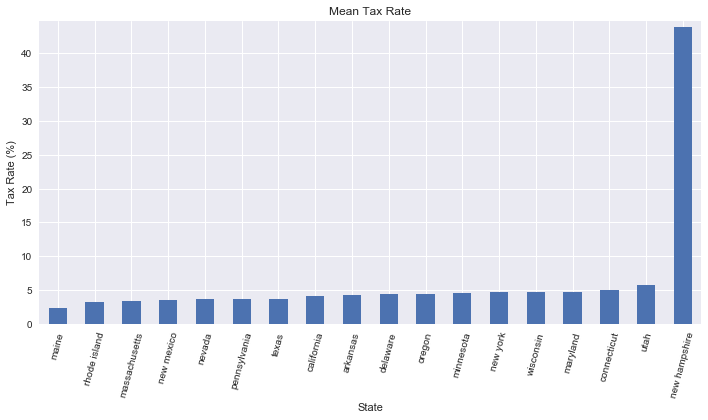

In [4]:
plt.figure(figsize=(10,6))
tax_group = pv_pop.groupby('state')['sales_tax_percent'].mean().sort_values()
tax_group['maine':'new hampshire'].plot(kind='bar')
plt.title('Mean Tax Rate')
plt.ylabel('Tax Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=75)
plt.margins(0.02)
plt.tight_layout()
plt.show()

A quick look at the taxes shows that the mean tax rate for each state being in a relatively narrow range with the exception of New Hampshire. These taxes are calculated taking into account any sales tax exemptions that may exist and are under 5% of total cost for most states.

### Which states are in this data set?

Count the number if installations for each state. California clearly dominates this dataset. 

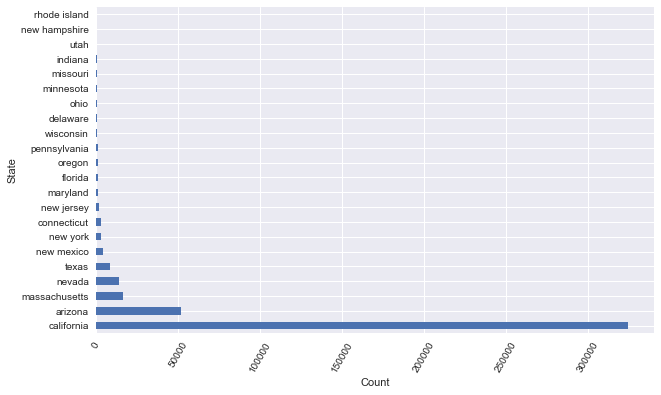

In [5]:
# number of installations per state
plt.figure(figsize=(10,6))
state_count = pv_pop['state'].value_counts(dropna=False)
state_count['california':'rhode island'].plot(kind='barh')
plt.xticks(rotation=60)
plt.ylabel('State')
plt.xlabel('Count')
plt.show()

### Types of installations and cost

Let's explore the types of installations and their median cost.

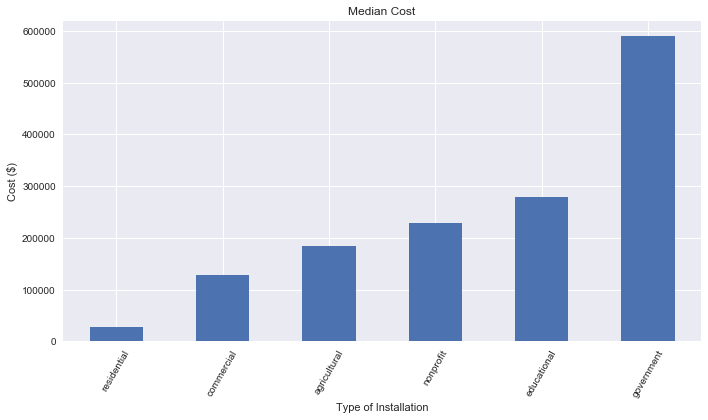

In [6]:
# =============================================================================
# INSTALL TYPE COST
# =============================================================================
plt.figure(figsize=(10,6))
pv_pop['install_type'].unique()
type_group = pv_pop.groupby('install_type')['cost'].median().sort_values()
type_group['residential':'government'].plot(kind='bar')
plt.title('Median Cost')
plt.ylabel('Cost ($)')
plt.xlabel('Type of Installation')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


The residential systems appear to be relatively cheap compared to the other categories. This makes sense because the residential systems would be smaller in terms of capacity as compared to other systems such as commercial or government which may require much greater energy consumption. 

### Types of installations and size

Let's look at median size/capacity of a system by category.

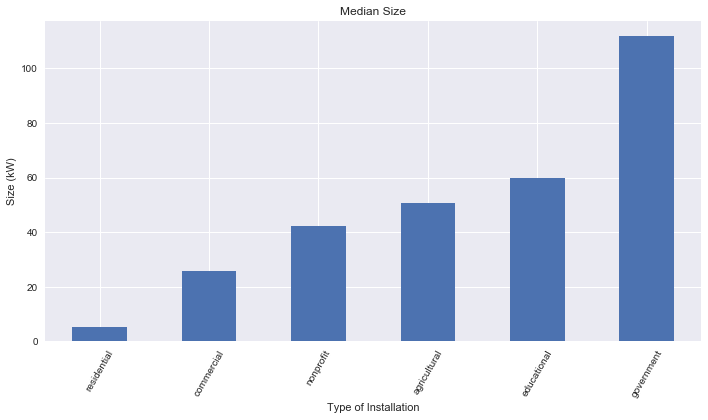

In [7]:
# SIZE/CAPACITY
plt.figure(figsize=(10,6))
install_type_size = pv_pop.groupby('install_type')['size_kw'].median().sort_values()
install_type_size[:'government'].plot(kind='bar')
plt.title('Median Size')
plt.ylabel('Size (kW)')
plt.xlabel('Type of Installation')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()


### What types of installations are in this data set?

Residential system size is small compared to other categories which makes sense. However, the graph below shows us that this dataset is mostly comprised of residential installations. Since residentials makes the most of this data set, it would be wise to explore the residential installations in detail.

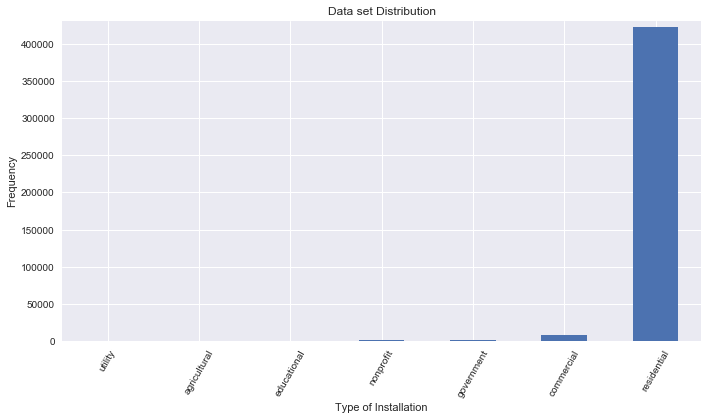

In [8]:
plt.figure(figsize=(10,6))
install_count = pv_pop['install_type'].value_counts().sort_values()
install_count.plot(kind='bar')
plt.title('Data set Distribution')
plt.ylabel('Frequency')
plt.xlabel('Type of Installation')
plt.xticks(rotation=60)
plt.margins(0.02)
plt.tight_layout()
plt.show()


In [9]:
residential_subset = pv_pop[pv_pop['install_type']=='residential']


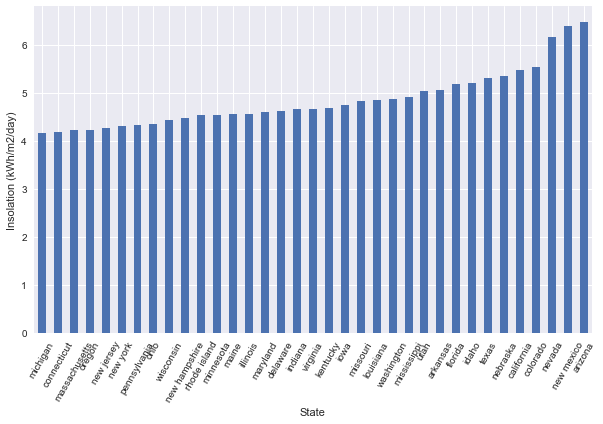

In [10]:
# state insolation
plt.figure(figsize=(10,6))
state_group_insol = residential_subset.groupby('state')['annual_insolation'].mean().sort_values()
state_group_insol.plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Insolation (kWh/m2/day)')
plt.xlabel('State')
plt.show()


### Outliers

Explore the outliers with a scatter plot of cost and capacity (size) of installations. 

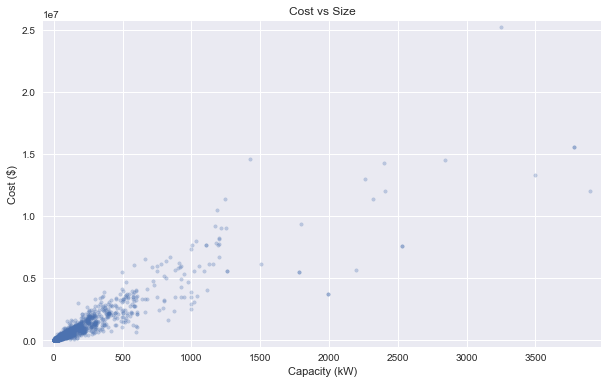

In [11]:
# scatter plot
# Cost vs Size
plt.figure(figsize=(10,6))
plt.scatter(x=residential_subset['size_kw'], y=residential_subset['cost'], marker='.', alpha=0.3)
plt.xlabel('Capacity (kW)')
plt.ylabel('Cost ($)')
#plt.ylim([0, 125000])
plt.title('Cost vs Size')
plt.margins(0.02)
plt.show()


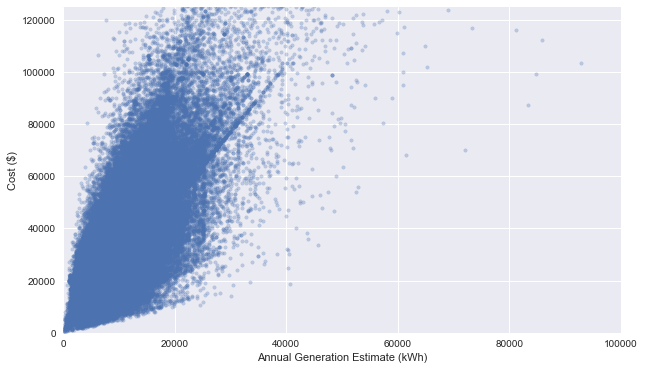

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(x=residential_subset['annual_pv_prod'], y=residential_subset['cost'], marker='.', alpha=0.3)
plt.xlabel('Annual Generation Estimate (kWh)')
plt.ylabel('Cost ($)')
plt.ylim([0, 125000])
plt.xlim([0, 1e5])
plt.margins(0.02)
plt.show()

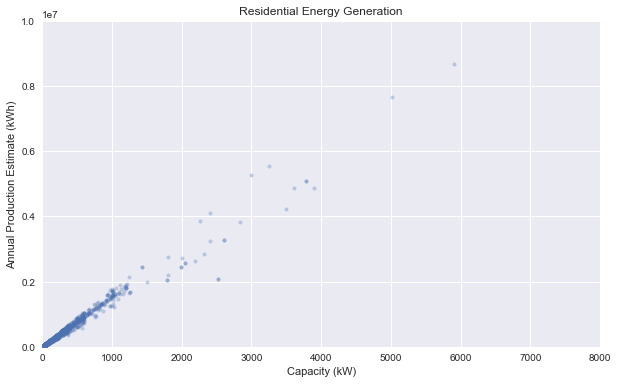

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(x=residential_subset['size_kw'], y=residential_subset['annual_pv_prod'], marker='.', alpha=0.3)
plt.xlabel('Capacity (kW)')
plt.ylabel('Annual Production Estimate (kWh)')
plt.xlim([0,8000])
plt.ylim([0,1e7])
plt.title('Residential Energy Generation')
plt.margins(0.02)
plt.show()

The scatter plots reveal a few things. Considering that we're looking at residential systems, the capacity and production doesn't make sense. The average electricity consumption per household is about 10,766 kWh per year in the United States. The plot above shows an estimated production of upto 10 million killowatt hours or 10,000 megawatt hours. These types of instances are not residential and therefore must be filtered out to produce a more realistic data set of energy production and system capacity.


In [14]:
percent90 = np.percentile(residential_subset['annual_pv_prod'], 90)
print('90th percentile annual energy production:', percent90, 'kWh')
print(residential_subset.describe())

90th percentile annual energy production: 14813.763918 kWh
         population        size_kw  annual_insolation  annual_pv_prod  \
count  4.224620e+05  422462.000000      422462.000000    4.224620e+05   
mean   3.663432e+05       9.239840           5.548428    1.414130e+04   
std    5.975730e+05    1230.527129           0.596892    1.858292e+06   
min    3.695600e+04       0.020000           1.272874    3.057154e+01   
25%    7.137100e+04       3.600000           5.347197    5.442530e+03   
50%    1.261810e+05       5.123800           5.553253    7.827075e+03   
75%    4.062530e+05       7.080000           5.782877    1.095344e+04   
max    8.405837e+06  737319.000000           6.761269    1.113476e+09   

       reported_annual_energy_prod  cost_per_watt          cost  \
count                 4.224620e+05  291781.000000  2.917810e+05   
mean                  3.848750e+03       5.512195  3.623357e+04   
std                   2.111220e+05       1.950654  1.532826e+05   
min            

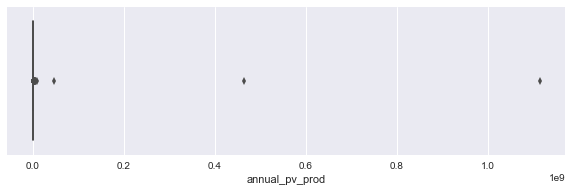

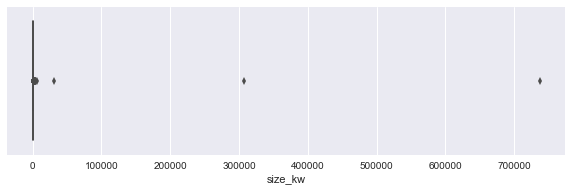

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
subset_res = pv_pop[pv_pop['install_type'] == 'residential']
sns.boxplot(x=subset_res['annual_pv_prod'])
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
subset_res = pv_pop[pv_pop['install_type'] == 'residential']
sns.boxplot(x=subset_res['size_kw'])
plt.show()


The box plots above are quite skewed by outliers so it's worth filtering outliers for one of the variables. Looking at the scale, it seems very unrealistic for residential installation capacity and energy production. Since the two variables are dependent, we can filter only one and the other will fall in line. 

Filter out the outliers by using data only within the 90 percentile. This will result in realistic residential data.

In [16]:
# filter by percentile
percent90 = np.percentile(residential_subset['annual_pv_prod'], 90)
print(percent90)
res_sub1000 = residential_subset[(residential_subset['annual_pv_prod']) < percent90][['annual_pv_prod', 'reported_annual_energy_prod', 'cost', 'size_kw']]
res_sub1000.describe()

# filter the outliers
res_sub90 = residential_subset[(residential_subset['annual_pv_prod']) < percent90]
res_sub90 = res_sub90.reset_index(drop=True)
residential_sub = res_sub90


14813.763918


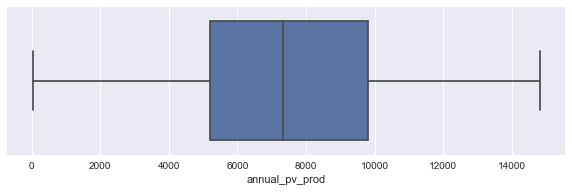

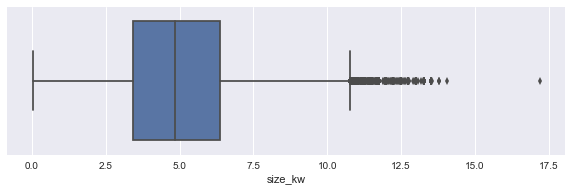

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.boxplot(x=residential_sub['annual_pv_prod'])
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
sns.boxplot(x=residential_sub['size_kw'])
plt.show()

In [18]:
# =============================================================================
# CUT INTERVAL FOR SIZE
# =============================================================================
# analyze each interval, small, normal, large
size = residential_sub['size_kw']
size.describe()

residential_sub['size_catg'] = pd.qcut(size.values, 3, labels=['small', 'normal', 'large'])




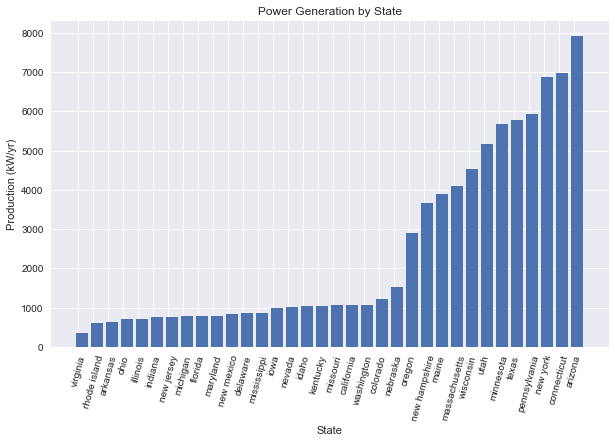

In [19]:
# states' production
state_group_prod = residential_sub.groupby('state')['reported_annual_energy_prod'].mean().sort_values()
plt.figure(figsize=(10,6))
left_ = np.arange(len(state_group_prod.index))
height_ = state_group_prod.values
plt.bar(left_, height_, width=0.8)
plt.xticks(left_-0.25, state_group_prod.index, rotation=75)
plt.title('Power Generation by State')
plt.ylabel('Production (kW/yr)')
plt.xlabel('State')
plt.show()

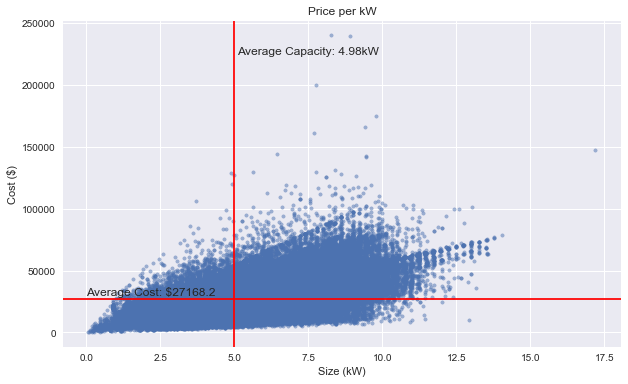

In [20]:


# scatter plot
# Cost vs Size
mean_cost = round(residential_sub['cost'].mean(), 2)
mean_size = round(residential_sub['size_kw'].mean(), 2)

plt.figure(figsize=(10,6))
plt.scatter(x=residential_sub['size_kw'], y=residential_sub['cost'], marker='.', alpha=0.5)
plt.xlabel('Size (kW)')
plt.ylabel('Cost ($)')
plt.title('Price per kW')

plt.axvline(x=residential_sub['size_kw'].mean(), color='red')
plt.axhline(y=residential_sub['cost'].mean(), color='red')

plt.text(x=0, y=30000, s=('Average Cost: ' + str('$') + str(mean_cost)))
plt.text(x=5.1, y=225000, s=('Average Capacity: ' +  str(mean_size) + str('kW')))

plt.show()


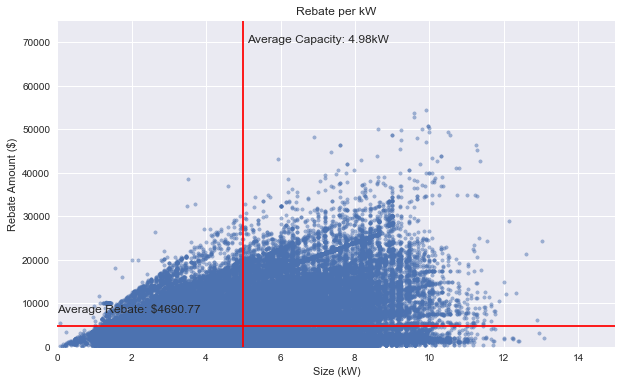

In [21]:
mean_rebate = round(residential_sub['rebate'].mean(), 2)
mean_size = round(residential_sub['size_kw'].mean(), 2)

plt.figure(figsize=(10,6))
plt.scatter(x=residential_sub['size_kw'], y=residential_sub['rebate'], marker='.',  alpha=0.5)
plt.xlabel('Size (kW)')
plt.ylabel('Rebate Amount ($)')
plt.title('Rebate per kW')
plt.ylim([0,75000])
plt.xlim([0, 15])

plt.axvline(x=residential_sub['size_kw'].mean(), color='red')
plt.axhline(y=residential_sub['rebate'].mean(), color='red')

plt.text(x=0, y=8000, s=('Average Rebate: ' + str('$') + str(mean_rebate)))
plt.text(x=5.1, y=70000, s=('Average Capacity: ' +  str(mean_size) + str('kW')))
plt.margins(0.05)
plt.show()


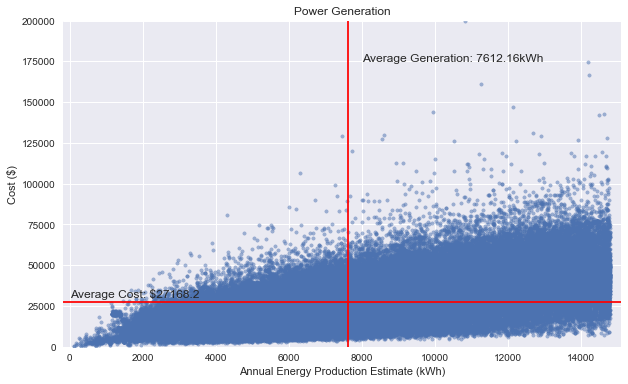

In [22]:
# Cost vs Power production
mean_prod = round(residential_sub['annual_pv_prod'].mean(), 2)
mean_cost = round(residential_sub['cost'].mean(), 2)

plt.figure(figsize=(10,6))
plt.scatter(x=residential_sub['annual_pv_prod'], y=residential_sub['cost'], marker='.', alpha=0.5)
plt.xlabel('Annual Energy Production Estimate (kWh)')
plt.ylabel('Cost ($)')
plt.title('Power Generation')

plt.ylim([0, 200000])
plt.margins(0.02)

plt.axvline(x=residential_sub['annual_pv_prod'].mean(), color='red')
plt.axhline(y=residential_sub['cost'].mean(), color='red')

plt.text(x=0, y=30000, s=('Average Cost: ' + str('$') + str(mean_cost)))
plt.text(x=8000, y=175000, s=('Average Generation: ' +  str(mean_prod) + str('kWh')))

plt.show()

### Distributions

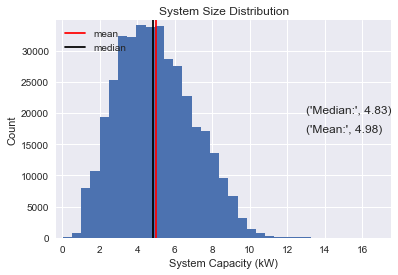

In [23]:
mean_si = round(residential_sub['size_kw'].mean(), 2)
median_si = round(residential_sub['size_kw'].median(), 2)

residential_sub['size_kw'].plot(kind='hist', bins=35)
plt.xlabel('System Capacity (kW)')
plt.ylabel('Count')
plt.margins(0.02)
plt.axvline(x=mean_si, color='red')
plt.axvline(x=median_si, color='black')
plt.title('System Size Distribution')
plt.legend(('mean', 'median'), loc='upper left')
plt.text(13, 20000, ('Median:', median_si))
plt.text(13, 17000, ("Mean:", mean_si))
plt.show()


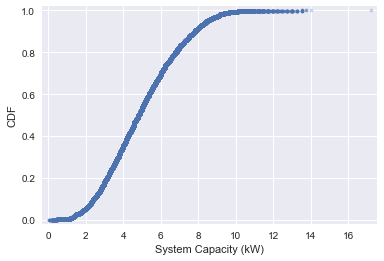

In [24]:
# =============================================================================
# ECDF
# =============================================================================
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

# ECDF for SIZE
x, y = ecdf(residential_sub['size_kw'])
plt.plot(x, y, marker='.', linestyle='none', alpha=0.3)
plt.margins(0.02)
plt.ylabel('CDF')
plt.xlabel('System Capacity (kW)')
plt.show()


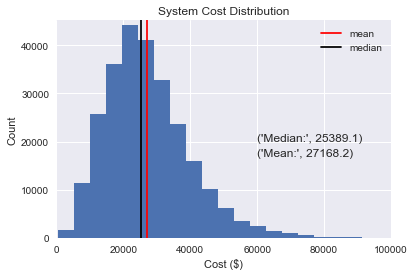

In [25]:
# plot cost distribution 
# limit x-axis under 100,000
mean_c = round(residential_sub['cost'].mean(), 2)
median_c = round(residential_sub['cost'].median(), 2)

residential_sub['cost'].plot(kind='hist', bins=50)
plt.xlabel('Cost ($)')
plt.ylabel('Count')
plt.margins(0.02)
plt.xlim([0, 100000])
plt.axvline(x=mean_c, color='red')
plt.axvline(x=median_c, color='black')
plt.title('System Cost Distribution')
plt.legend(('mean', 'median'), loc='upper right')
plt.text(60000, 20000, ('Median:', median_c))
plt.text(60000, 17000, ("Mean:", mean_c))
plt.show()


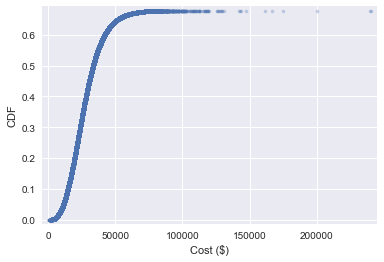

In [26]:
# ECDF
x_, y_ = ecdf(residential_sub['cost'])
plt.plot(x_, y_, marker='.', linestyle='none', alpha=0.3)
plt.margins(0.02)
plt.ylabel('CDF')
plt.xlabel('Cost ($)')
plt.show()


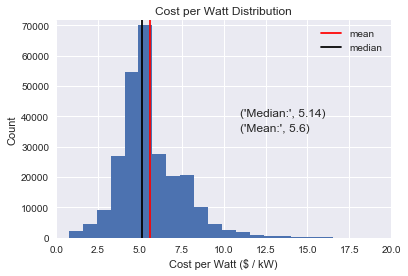

In [27]:
mean_cw = round(residential_sub['cost_per_watt'].mean(), 2)
median_cw = round(residential_sub['cost_per_watt'].median(), 2)

residential_sub['cost_per_watt'].plot(kind='hist', bins=35)
plt.xlabel('Cost per Watt ($ / kW)')
plt.ylabel('Count')
plt.margins(0.02)
plt.xlim([0, 20])
plt.axvline(x=mean_cw, color='red')
plt.axvline(x=median_cw, color='black')
plt.title('Cost per Watt Distribution')
plt.legend(('mean', 'median'), loc='upper right')
plt.text(11, 40000, ('Median:', median_cw))
plt.text(11, 35000, ("Mean:", mean_cw))
plt.show()

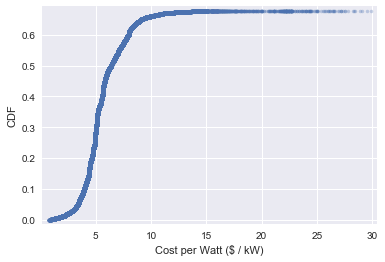

In [28]:
# ECDF
x_, y_ = ecdf(residential_sub['cost_per_watt'])
plt.plot(x_, y_, marker='.', linestyle='none', alpha=0.3)
plt.margins(0.02)
plt.ylabel('CDF')
plt.xlabel('Cost per Watt ($ / kW)')
plt.show()

### Correlations

The following correlations are for all installation types, residential, educational, government, commercial, nonprofit, utility, and agricultural.

In [29]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]


In [30]:
# CORRELATION
# drop NA before computing correlation
residential_sub[residential_sub['cost'].isnull().values] = np.nan
clean_pv = residential_sub.dropna(axis=0, how='all').reset_index(drop=True)
clean_pv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258251 entries, 0 to 258250
Data columns (total 24 columns):
date_installed                 258251 non-null object
city                           258251 non-null object
state_short                    258251 non-null object
state                          258251 non-null object
county                         255577 non-null object
population                     258251 non-null float64
size_kw                        258251 non-null float64
annual_insolation              258251 non-null float64
annual_pv_prod                 258251 non-null float64
reported_annual_energy_prod    258251 non-null float64
cost_per_watt                  258251 non-null float64
cost                           258251 non-null float64
sales_tax_cost                 201165 non-null float64
rebate                         170213 non-null float64
incentive_prog_names           258251 non-null object
install_type                   258251 non-null object
installer       

In [31]:
r = pearson_r(clean_pv['size_kw'].values, clean_pv['cost'].values)
print('Pearson correlation between cost and size/capacity:', r)

Pearson correlation between cost and size/capacity: 0.714074107555


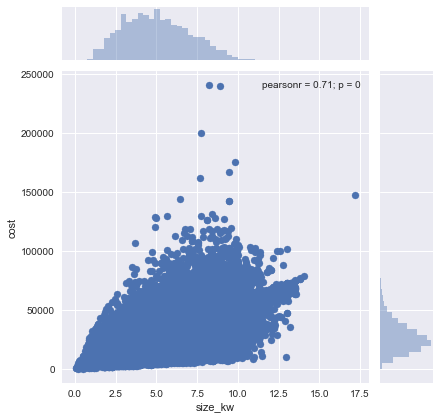

In [32]:
plt.figure(figsize=(10,6))
sns.jointplot(x='size_kw', y='cost', data=clean_pv)
plt.show()


### 1. Which states have the least and most expensive installations; which states have highest incentives? 

The available data for incentives and rebate amount only includes the rebate received from state government, not the federal. Federal incentives may be available but are not represented in this dataset. Rebate amount is not available for all states.

#### Average Rebate and Cost Comparison

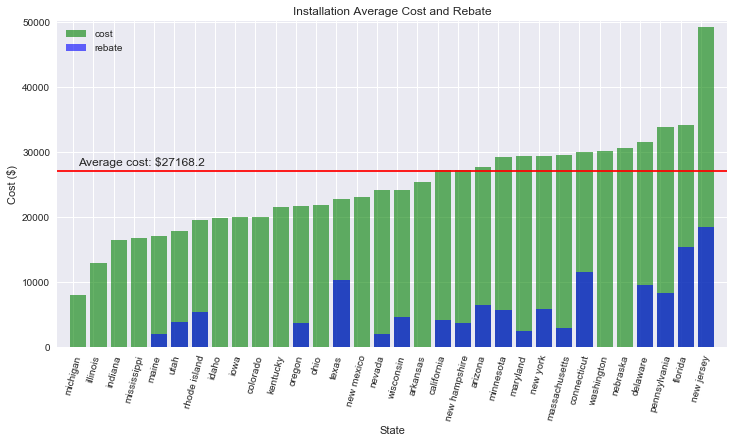

In [71]:
# groupby state, compute mean for cost and rebate
residential_cost = residential_sub.groupby('state')[['rebate', 'cost']].mean().sort_values(by='cost')
ave_cost = round(residential_sub['cost'].mean(), 2)


left_cost = np.arange(len(residential_cost['michigan':'new jersey']))
height_cost = residential_cost['michigan':'new jersey']['cost']

left_reb = np.arange(len(residential_cost['michigan':'new jersey']))
height_reb = residential_cost['michigan':'new jersey']['rebate']

plt.figure(figsize=(12,6))
rect1 = plt.bar(left_cost, height_cost, width=0.8, color='green', alpha=0.6)
rect2 = plt.bar(left_reb, height_reb, width=0.8, color='blue', alpha=0.6)

plt.xticks(left_cost - 0.25, residential_cost['michigan':'new jersey'].index, rotation = 75)
plt.title('Installation Average Cost and Rebate')
plt.ylabel('Cost ($)')
plt.xlabel('State')
plt.axhline(y=ave_cost, color='red')
plt.text(0, 28000, s= ('Average cost: ' + str('$') + str(ave_cost)))
plt.legend((rect1[0], rect2[0]) ,['cost', 'rebate'], loc='upper left')
plt.margins(0.02)
plt.show()

From the plot above, we can conclude that some states such as New Jersey, Florida, and Delaware have some of the highest installation costs. These cost only include the material and labor. Altough, their rebates are relatively high as well. 



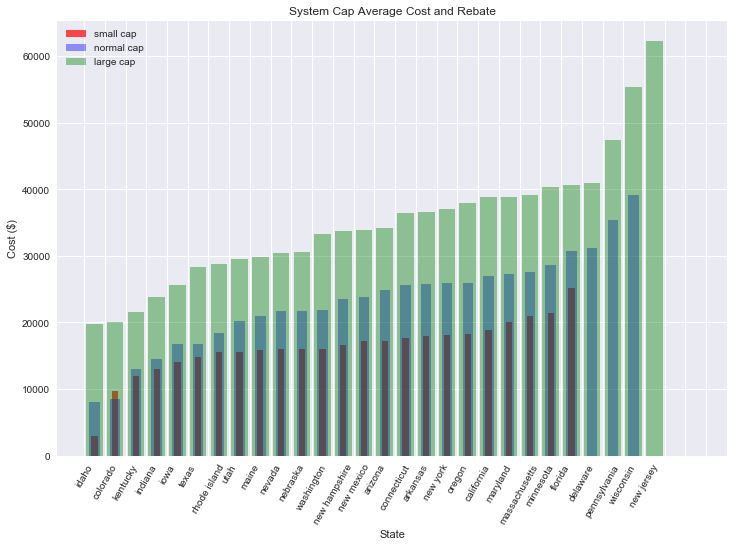

In [53]:
small_sys = residential_sub[residential_sub['size_catg'] == 'small']
normal_sys = residential_sub[residential_sub['size_catg'] == 'normal']
large_sys = residential_sub[residential_sub['size_catg'] == 'large']

small_sys_cost = small_sys.groupby('state')['cost'].mean().sort_values()
normal_sys_cost = normal_sys.groupby('state')['cost'].mean().sort_values()
large_sys_cost = large_sys.groupby('state')['cost'].mean().sort_values()

ave_cost = round(residential_sub['cost'].mean(), 2)
htg = residential_sub.cost.values
# small cap system
sm_cost = np.arange(len(small_sys_cost['virginia':'new jersey']))
sm_height_cost = small_sys_cost['virginia':'new jersey'].values
# normal cap system
norm_cost = np.arange(len(normal_sys_cost['michigan':'new jersey']))
norm_height_cost = normal_sys_cost['michigan':'new jersey'].values
# large cap system
lrg_cost = np.arange(len(large_sys_cost['idaho':'new jersey']))
lrg_height_cost= large_sys_cost['idaho':'new jersey'].values


plt.figure(figsize=(12,8))
rect1 = plt.bar(sm_cost, sm_height_cost, width=0.3, color='red', alpha=0.7) # small
rect2 = plt.bar(norm_cost, norm_height_cost, width=0.5, color='blue', alpha=0.4) # normal
rect3 = plt.bar(lrg_cost, lrg_height_cost, width=0.8, color='green', alpha=0.4) # large

plt.xticks(lrg_cost - 0.5, large_sys_cost.index, rotation = 60)
plt.title('System Cap Average Cost and Rebate')
plt.ylabel('Cost ($)')
plt.xlabel('State')
#plt.axhline(y=ave_cost, color='red')
#plt.text(0, 28000, s= ('Average cost: ' + str('$') + str(ave_cost)))
plt.legend(('small cap', 'normal cap', 'large cap'), loc='upper left')
plt.show()

### 2. How have the prices changed over the years?



In [35]:
date_time = '%m/%d/%Y'
datetime = pd.to_datetime(residential_sub['date_installed'], format=date_time)
pv_pop_date = residential_sub.set_index(datetime)


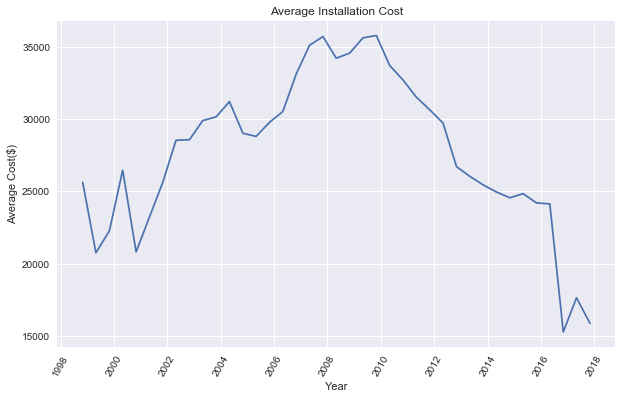

Average installation price decrease of 51.27% since 2008 peak.


In [36]:
# =============================================================================
# Cost Time-Series
# =============================================================================
# resample by 6 months and compute mean
mean_cost = pv_pop_date['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')

plt.figure(figsize=(10,6))
plt.plot(mean_cost['1998' : '2017'])
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('Average Installation Cost')
plt.show()

percent_change = (mean_cost['2008'].mean() - mean_cost['2017'].mean()) / mean_cost['2008'].mean()
print('Average installation price decrease of ' + str(round(percent_change*100, 2)) + '% since 2008 peak.')


In [37]:
# =============================================================================
# CUT INTERVAL FOR SIZE
# =============================================================================
size = pv_pop_date['size_kw']
pv_pop_date['size_catg'] = pd.qcut(size.values, 3, labels=['small', 'normal', 'large'])

small_sys = pv_pop_date[pv_pop_date['size_catg'] == 'small']
normal_sys = pv_pop_date[pv_pop_date['size_catg'] == 'normal']
large_sys = pv_pop_date[pv_pop_date['size_catg'] == 'large']


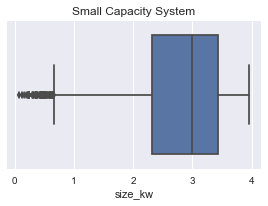

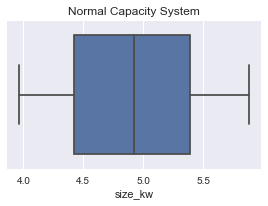

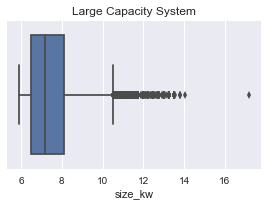

In [38]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(small_sys['size_kw'])
plt.title('Small Capacity System')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(222)
sns.boxplot(normal_sys['size_kw'])
plt.title('Normal Capacity System')
plt.show()

plt.figure(figsize=(10,6))
plt.subplot(223)
sns.boxplot(large_sys['size_kw'])
plt.title('Large Capacity System')
plt.show()

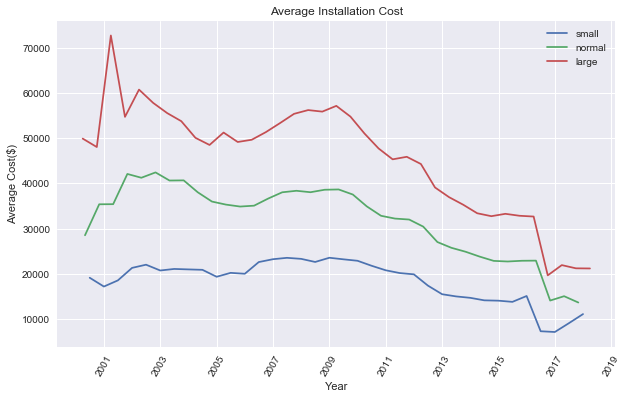

In [58]:

# =============================================================================
# Time-Series
# Small, Normal, Large Systems
# =============================================================================
small_sys = pv_pop_date[pv_pop_date['size_catg'] == 'small']
normal_sys = pv_pop_date[pv_pop_date['size_catg'] == 'normal']
large_sys = pv_pop_date[pv_pop_date['size_catg'] == 'large']

# extract cost and resample
small_sys_cost = small_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')
normal_sys_cost = normal_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')
large_sys_cost = large_sys['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')

# plot size
plt.figure(figsize=(10,6))
# plot TS
plt.plot(small_sys_cost['2000':'2018'])
plt.plot(normal_sys_cost['2000':'2018'])
plt.plot(large_sys_cost['2000':'2018'])
# label
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('Average Installation Cost')
plt.legend(('small', 'normal', 'large'), loc='upper right')
plt.show()


In [68]:
print('Small capacity average: ' + str(round(small_sys['size_kw'].mean(), 2)))
print('Normal capacity average: ' + str(round(normal_sys['size_kw'].mean(), 2)))
print('Large capacity average: ' + str(round(large_sys['size_kw'].mean(), 2)))

print('Small capacity system cost between 2016 and 2018: ' + str('$') + str(round(small_sys_cost['2016':'2018'].mean(), 2)))
print('Normal capacity system cost between 2016 and 2018: ' + str('$') + str(round(normal_sys_cost['2016':'2018'].mean(), 2)))
print('Large capacity system cost between 2016 and 2018: ' + str('$') + str(round(large_sys_cost['2016':'2018'].mean(), 2)))


Small capacity average: 2.85
Normal capacity average: 4.91
Large capacity average: 7.4
Small capacity system cost between 2015 and 2017: $8601.0
Normal capacity system cost between 2015 and 2017: $16388.94
Large capacity system cost between 2015 and 2017: $23302.34


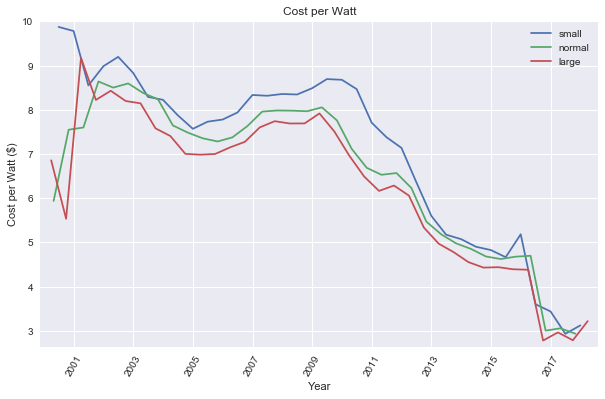

In [40]:
# resample by 6 months and compute mean
sm_cost_per_watt = small_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')
nr_cost_per_watt = normal_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')
lg_cost_per_watt = large_sys['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')


plt.figure(figsize=(10,6))
# plot TS
plt.plot(sm_cost_per_watt['2000':'2018'])
plt.plot(nr_cost_per_watt['2000':'2018'])
plt.plot(lg_cost_per_watt['2000':'2018'])
# label
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Cost per Watt ($)')
plt.title('Cost per Watt')
plt.legend(('small', 'normal', 'large'), loc='upper right')
plt.margins(0.02)
plt.show()

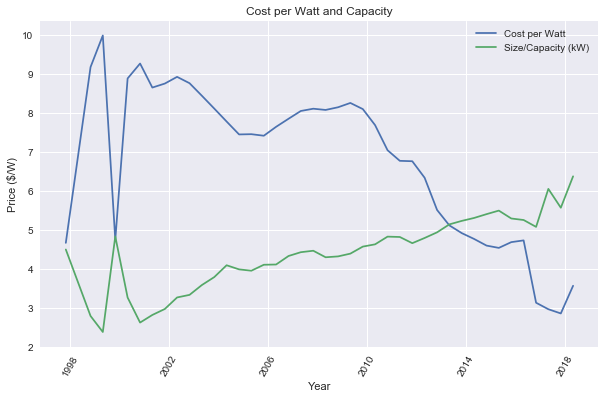

Cost per watt has decreased 77.18% since 1998.


In [41]:
cost_per_watt = pv_pop_date['cost_per_watt'].resample('6M').agg('mean').dropna(axis=0, how='all')
size_plt = pv_pop_date['size_kw'].resample('6M').agg('mean').dropna(axis=0, how='all')
#dates_cost_watt = cost_per_watt.index[::2]
#labels_cost_watt = dates_cost_watt.strftime('%b-%Y')

plt.figure(figsize=(10,6))
plt.plot(cost_per_watt)
plt.plot(size_plt)
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Price ($/W)')
plt.title('Cost per Watt and Capacity')
plt.legend(('Cost per Watt', 'Size/Capacity (kW)'), loc='upper right')
plt.show()

percent_change = (cost_per_watt['1998'].mean() - cost_per_watt['2017'].mean()) / cost_per_watt['2008'].mean()
print('Cost per watt has decreased ' + str(round(percent_change*100, 2)) + '% since 1998.')


Note that the above plot actually contains two different units on y-axis. The cost per watt is represented by dollars and the capacity is represented by kilowatts. The relationship appears to be inverserly proportional. Cost per watt is more indicative of advancements in technology than the installation costs as seen earlier. As the price per unit decreased, people began installing larger capacity systems as each panel became cheaper. 

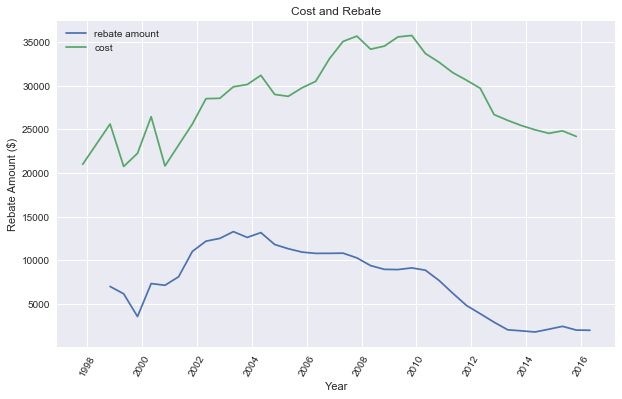

In [42]:
# Rebates
# =============================================================================
mean_rebate_6M = pv_pop_date['rebate'].resample('6M').agg('mean').dropna(axis=0, how='all')
dates_re= mean_rebate_6M['1998':].index[::2]
labels_re = dates_re.strftime('%b-%Y')

plt.figure(figsize=(10,6))
plt.plot(mean_rebate_6M['1998':])
plt.plot(mean_cost[:dates_re[-1]])
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Rebate Amount ($)')
plt.legend(('rebate amount', 'cost'), loc='upper left')
plt.title('Cost and Rebate')
plt.show()


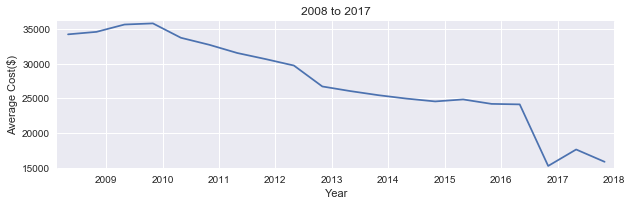

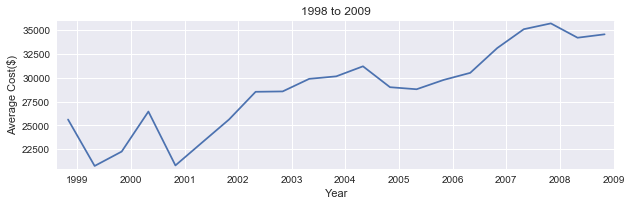

In [43]:
# =============================================================================
# 2009 to 2017
# =============================================================================
mean_cost = pv_pop_date['cost'].resample('6M').agg('mean').dropna(axis=0, how='all')

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(mean_cost['2008':'2017'])
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('2008 to 2017')
plt.margins(0.02)
plt.show()

# =============================================================================
# 1998 to 2009
# =============================================================================
plt.figure(figsize=(10,6))
plt.subplot(2,1,2)
plt.plot(mean_cost['1998':'2008'])
plt.xlabel('Year')
plt.ylabel('Average Cost($)')
plt.title('1998 to 2009')
plt.margins(0.02)
plt.show()

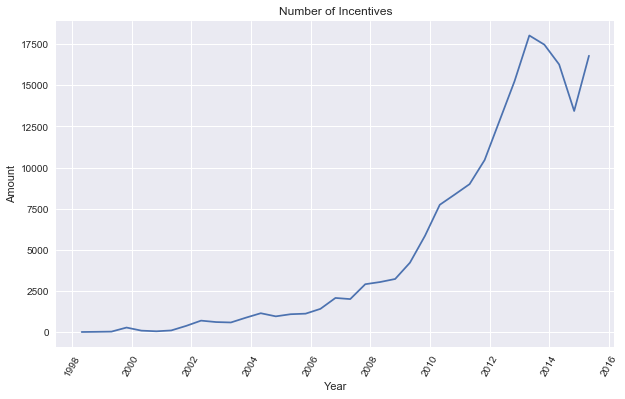

Number of incentives increased 228118.18%


In [44]:
# =============================================================================
# Count Incentives and Rebates
# =============================================================================
incent_count = pv_pop_date['incentive_prog_names'].resample('6M').agg('count').dropna(axis=0, how='all')

plt.figure(figsize=(10,6))
plt.plot(incent_count['1998':'Jul-2015'])
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Number of Incentives')
plt.show()

percent_chng = abs((incent_count['1998'].values.sum() - incent_count['2016'].values.sum()) / incent_count['1998'].values.sum()) * 100
print('Number of incentives increased ' + str(round(percent_chng, 2)) + '%')

#### Power Generation (Annual)
The following plots show the annual power production estimates as well as the actual. In general, the power output calculation has a number of variables including area of array, panel efficiency, average annual solar radiation, and performance ratio. In addition, other factors can can affect an array's output such as hours of direct sunlight, orientation, and of course adverse weather conditions. 

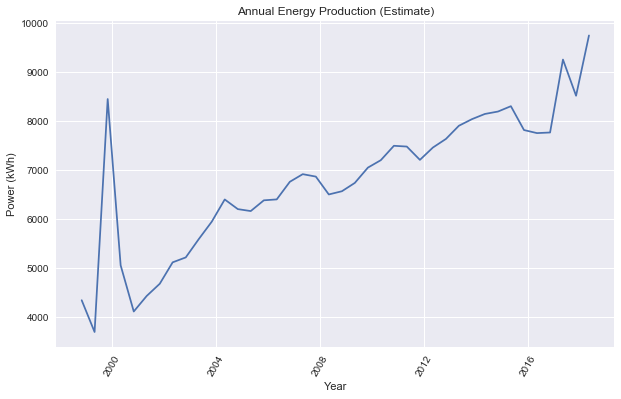

In [45]:
# =============================================================================
# Production
# Estimated Production
# =============================================================================
mean_kwh_prod = pv_pop_date['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')

plt.figure(figsize=(10,6))
plt.plot(mean_kwh_prod['1998':])
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Power (kWh)')
plt.title('Annual Energy Production (Estimate)')
plt.show()


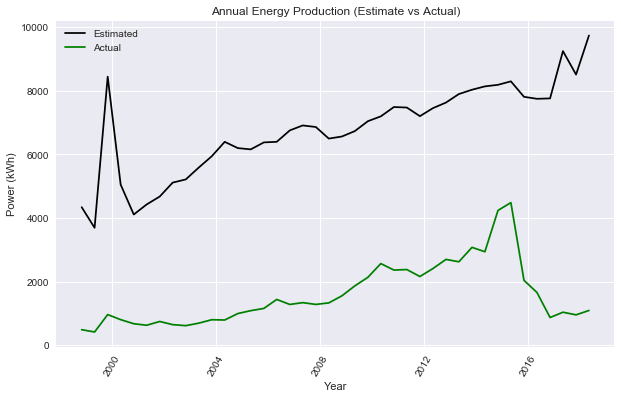

In [46]:
# Actual/Reported Production
# =============================================================================
mean_kwh_act = pv_pop_date['reported_annual_energy_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')
#dates = yearly_mean_kwh_act['1998':].index[::2]
#labels = dates.strftime('%b-%Y')

plt.figure(figsize=(10,6))
plt.plot(mean_kwh_prod['1998':], color='black') # estimated/theoretical
plt.plot(mean_kwh_act['1998':], color='green') # actual energy output
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Power (kWh)')
plt.legend(('Estimated', 'Actual'), loc='upper left')
plt.title('Annual Energy Production (Estimate vs Actual)')
plt.show()

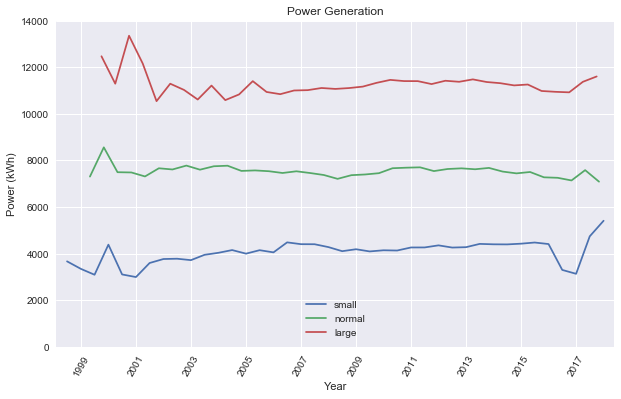

In [47]:
# =============================================================================
# Power Generation
# Small, Normal, Large Systems
# =============================================================================

sm_mean_kwh_prod = small_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')
nr_mean_kwh_prod = normal_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')
lg_mean_kwh_prod = large_sys['annual_pv_prod'].resample('6M').agg('mean').dropna(axis=0, how='all')


plt.figure(figsize=(10,6))
plt.plot(sm_mean_kwh_prod['1998':'2017'])
plt.plot(nr_mean_kwh_prod['1998':'2017'])
plt.plot(lg_mean_kwh_prod['1999':'2017'])

plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Power (kWh)')
plt.title('Power Generation')
plt.ylim([0, 14000])
plt.legend(('small', 'normal', 'large'), loc='lower center')
plt.margins(0.02)
plt.show()

#### Number of Installations

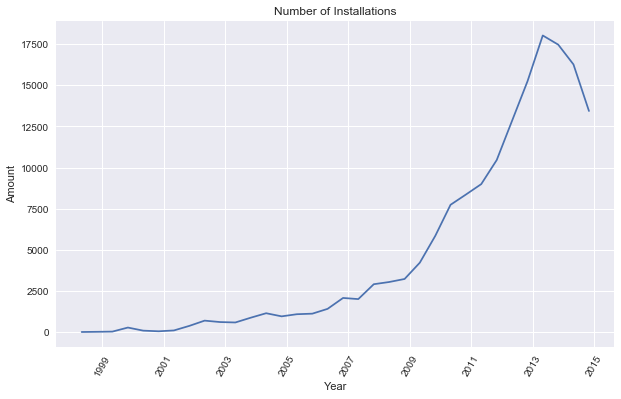

In [48]:
# =============================================================================
# Number of Installations
# =============================================================================
# count installations per year
install_count = pv_pop_date['cost'].resample('6M').agg('count').dropna(axis=0, how='all')

plt.figure(figsize=(10,6))
plt.plot(install_count['1998':'Jan 2015']) 
plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Number of Installations')
plt.show()

#### 3. Which factors contribute the most to the total cost? 

Where is the greatest correlation between cost and another variable?

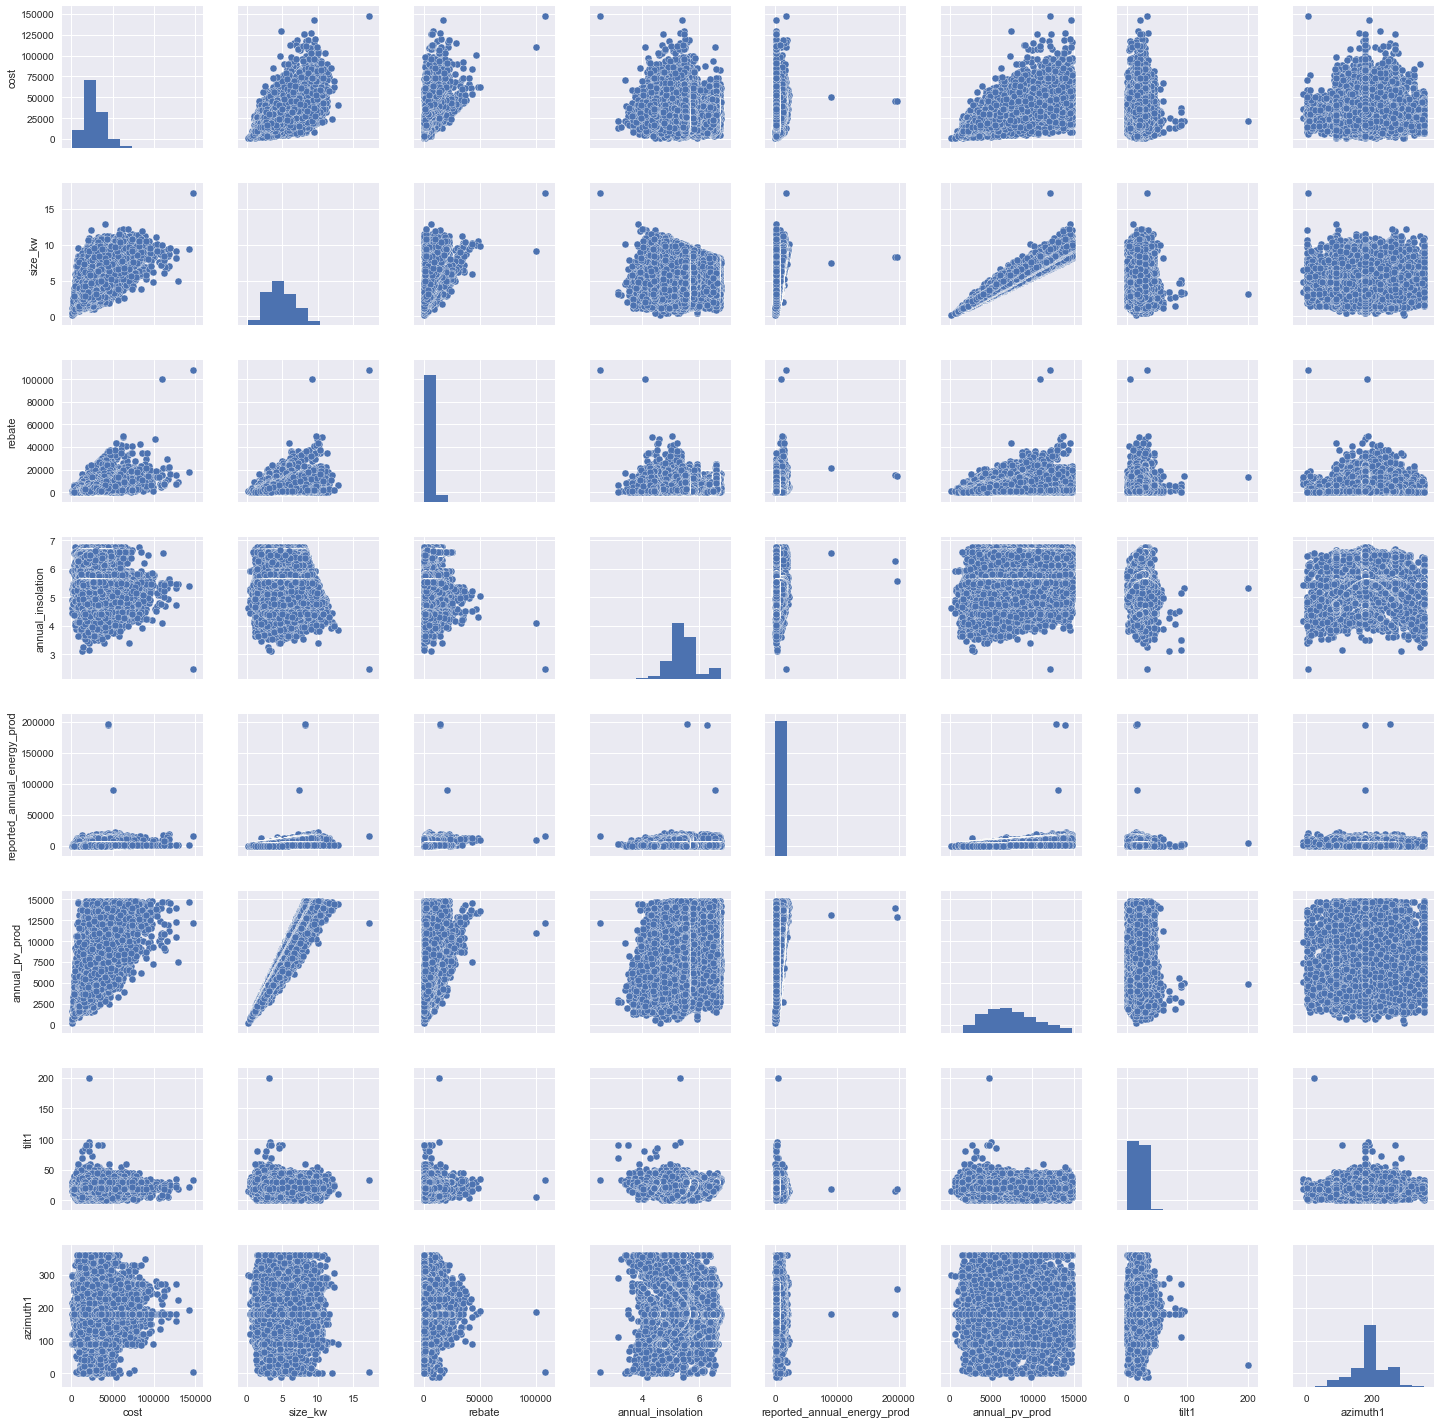

In [49]:
# CORRELATION
# drop NA before computing correlation
clean_pv = residential_sub.dropna(how='any').reset_index(drop=True)
pearson_r(clean_pv['size_kw'],clean_pv['cost'])

# pair plot
sns.pairplot(clean_pv[['cost', 'size_kw', 'rebate', 'annual_insolation', 'reported_annual_energy_prod',
                       'annual_pv_prod', 'tilt1', 'azimuth1']])
plt.show()

In [50]:
test_ls = ['cost', 'size_kw', 'rebate', 'annual_insolation', 'reported_annual_energy_prod',
                       'annual_pv_prod', 'tilt1', 'azimuth1']

for item in test_ls:
  n = pearson_r(clean_pv[item],clean_pv['cost'])
  print('cost-' + str(item) + str(': ') + str(n))

cost-cost: 1.0
cost-size_kw: 0.709445662534
cost-rebate: 0.458953628321
cost-annual_insolation: -0.0253059127972
cost-reported_annual_energy_prod: 0.104953525091
cost-annual_pv_prod: 0.681632609496
cost-tilt1: 0.00318535201356
cost-azimuth1: 0.0232030160286


The largest pearon-r value is found to be between cost and capacity, and the cost-estimate of annual production (kWh) of a solar panel array. However, the second is less reliable as the estimate of energy production depends on numerous variables such as the geographic location (radiation varies), weather conditions, tilt, and hours of direct sunlight. As these factors may vary, the correlation between cost and estimated energy production will vary as well. 

# The Story of Sunshine

It provides our planet with seemingly endless energy every single day since the birth of our solar system, that is the Sun. We have made significant technological progress to enable us to capture some of that energy. 

Over the past 20 years, on average, the most expensive installation costs were in New Jersey(`$`49,282.18), Florida(`$`34,231.69), and Pennsylvania (`$`33,941.69), respectively. The highest rebates were achieved by New Jersey(`$`18,322.60), Florida(`$`15,437.61), and Connecticut(`$`11,637.82). The cheapest installation costs were in Michigan(`$`8,000), Illinois(`$`13,000), and Indiana(`$`16,453.15). Also, it's important to note that these figures encompass the past 20 years and are not representative of the most recent figures. 

Installation costs peaked between years 2008 and 2009 and have been declining since that time. To be more precise, installation costs have declined about 51% since 2008. It is also important to note that the *cost per watt* has actually been declining since 1998 with a change of 77%. During the period of 1998 to 2018 the number of installations and number of rebates has increased dramatically due to the change in costs and advancements in photovoltaic technology. These developments have created more favorable conditions for the consumer to switch to solar power. 

It is no surprise to find that a large capacity system (10kW) would cost more than a relatively small capacity (3kW). The capacity of the system is one of the major contributors to the installation cost. However, since insolation rates vary depending on geographic location, a system of same capacity (ex. 5kW) will not produce the same amount of energy around the country. So, dependning on how much energy a home consumes annually, the system capacity will be sized accordingly. Thus the cost will also depend on the amount of energy a home consumes throughout the year.    